# **<font color='red'>Introduction and Initial Data Exploration</font>**

### **Project background and objectives**

### **Dataset overview and descriptive statistics**

To begin with, we will import all the libraries we will use in this project, as well as our dataset.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso



df = pd.read_csv('autos.csv')

### General overview of the dataset

We start with df.head() to quickly see the first few rows of our DataFrame so we can confirm the column names, data types, and sample values before diving deeper.

In [129]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [130]:
df.shape

(371528, 21)

We have a dataset containing 21 columns describing more than 370,000 used car listings. These columns include information on the vehicle specifications, equipment, mileage, age, fuel type, location, and other relevant characteristics.
The goal is to predict the **price** of a used car based on these features.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [132]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


We call df.describe() to get quick summary stats (count, mean, std, quartiles) for our numeric columns, for example checking a price column’s min/median/max helps us spot outliers before deeper analysis.



### Motivation for data cleaning

Using the first checks (`df.head()`, `df.info()`, `df.describe()`), we see 371,528 rows across 21 columns with many holes (e.g., `vehicleType` missing in ~37k rows and `notRepairedDamage` missing in ~72k), and several clearly inconsistent values: prices range from 0 to 2,147,484,000 while the median is only 2,950; registration years run from 1000 to 9999; `powerPS` goes from 0 to 20,000; mileage is capped at 150,000 km with a 5,000 km floor; `nrOfPictures` is stuck at 0.
These concrete issues point to outliers and entry errors that would distort the distributions and any model we train.

Therefore, before proceeding with deeper analysis or modeling, we now move on to the data cleaning phase, in which we will correct impossible values, handle missing data, detect and treat outliers, and prepare the dataset for further processing.


# **<font color='red'>Data Cleaning</font>**

### **Handling missing values**

In [133]:
missing_values = df.isnull().sum().to_frame('Missing_values')
missing_values['Percentage_missing_values'] = ((missing_values['Missing_values']/df.shape[0])*100)

missing_values.style\
    .format({'Percentage_missing_values': '{:.2f}%'} )\
    .background_gradient(cmap='Reds')\
    .set_properties(**{'text-align': 'center'})

,Missing_values,Percentage_missing_values
index,0,0.00%
dateCrawled,0,0.00%
name,0,0.00%
seller,0,0.00%
offerType,0,0.00%
price,0,0.00%
abtest,0,0.00%
vehicleType,37869,10.19%
yearOfRegistration,0,0.00%
gearbox,20209,5.44%


Our initial idea was to delete all rows from the dataset containing at least one missing value. However, we realized that there are too many rows concerned, so this solution is no longer feasible because it would completely skew our predictions. We will therefore analyze and process the columns on a case-by-case basis:

In [134]:
missing_cols = df.columns[df.isnull().any()]

df[missing_cols].dtypes

vehicleType          object
gearbox              object
model                object
fuelType             object
notRepairedDamage    object
dtype: object

Since all of our missing columns are 'objects', we are going to work on those **objective categorical features** of our dataset:  
`vehicleType`, `gearbox`, `model`, `fuelType`, and `notRepairedDamage`.

These columns represent well-defined, factual properties of a car (type, model, fuel, gearbox, repair status), not subjective opinions or free text. Because of that, it is reasonable to try to infer missing values from **similar cars** in the dataset.

Our strategy is:

1. **Create missing-value indicators**  
   For each categorical feature with missing values, we add a companion column (e.g. `model_was_missing`) that records whether the original value was missing. This lets downstream models know that the information was absent in the raw data.

2. **Similarity-based imputation**  
   For `vehicleType`, `gearbox`, `model`, and `fuelType`, we look for other rows that describe similar cars (same brand, powerPS, yearOfRegistration, and other relevant characteristics).  
   If we find enough similar cars, we impute the most frequent category among them.

3. **Explicit “Unknown” categories as fallback**  
   When we cannot confidently infer a value (not enough similar examples), we do **not** guess. Instead, we assign an explicit category such as `Unknown_model` or `Unknown_fuelType`, making the uncertainty transparent.

4. **Special case: `notRepairedDamage`**  
   For `notRepairedDamage`, missing values are replaced by the category `unknown`, indicating that the repair status of the vehicle is not known.

This approach keeps the data usable for modeling while limiting bias and avoiding fabricated information.


In [135]:
def impute_by_similarity(df, target_col, keys, min_matches=3):
    df = df.copy()
    missing_mask = df[target_col].isna()
    n_missing = missing_mask.sum()

    if n_missing == 0:
        return df, 0

    df_missing = df.loc[missing_mask, keys].copy()
    df_missing["_row_id"] = df_missing.index
    df_known = df.loc[~missing_mask, keys + [target_col]].copy()

    merged = df_missing.merge(
        df_known,
        on=keys,
        how="left",
        suffixes=("", "_y")
    )

    merged = merged.dropna(subset=[target_col])
    if merged.empty:
        return df, 0

    grouped = merged.groupby("_row_id")[target_col]
    counts = grouped.size()
    modes = grouped.agg(lambda s: s.mode().iloc[0])

    valid_idx = counts[counts >= min_matches].index
    if len(valid_idx) == 0:
        return df, 0

    mode_per_row = modes.loc[valid_idx]
    df.loc[mode_per_row.index, target_col] = mode_per_row

    n_imputed = len(mode_per_row)
    return df, n_imputed


def process_data(df):
    df = df.copy()

    cat_cols_to_impute = ["vehicleType", "gearbox", "model", "fuelType"]
    repair_col = "notRepairedDamage"

    for col in cat_cols_to_impute + [repair_col]:
        df[f"{col}_was_missing"] = df[col].isna()

    similarity_keys = {
        "model":       ["brand", "vehicleType", "fuelType", "gearbox", "powerPS", "yearOfRegistration"],
        "fuelType":    ["brand", "vehicleType", "gearbox", "model", "powerPS", "yearOfRegistration"],
        "gearbox":     ["brand", "vehicleType", "fuelType", "model", "powerPS", "yearOfRegistration"],
        "vehicleType": ["brand", "fuelType", "gearbox", "model", "powerPS", "yearOfRegistration"],
    }

    initial_missing = df[cat_cols_to_impute].isna().sum()
    similarity_counts = {}
    remaining_after_similarity = {}

    print("=" * 32)
    print("Missing value imputation summary")
    print("=" * 32)

    for col in cat_cols_to_impute:
        df, n_imp = impute_by_similarity(df, col, similarity_keys[col], min_matches=3)
        similarity_counts[col] = n_imp
        remaining_after_similarity[col] = df[col].isna().sum()

    print("\nPer-column counts (similarity vs unknown):")
    for col in cat_cols_to_impute:
        init = int(initial_missing[col])
        sim = int(similarity_counts.get(col, 0))
        unk = int(remaining_after_similarity[col])
        print(f"- {col}: {sim} imputed by similarity, {unk} imputed as Unknown_{col} (initial missing: {init})")

    for col in cat_cols_to_impute:
        remaining = df[col].isna().sum()
        if remaining > 0:
            unknown_label = f"Unknown_{col}"
            df[col] = df[col].fillna(unknown_label)

    if repair_col in df.columns:
        n_before = df[repair_col].isna().sum()
        df[repair_col] = df[repair_col].fillna("unknown")
        n_after = df[repair_col].isna().sum()
        print(f"\n{repair_col}: {n_before} values imputed as 'unknown' (remaining NaN: {n_after})")

    print("\nFinal check (remaining missing values):")
    final_missing = df[cat_cols_to_impute + [repair_col]].isna().sum()
    print(final_missing.to_string())

    print("\n" + "=" * 20)
    print("Imputation completed")
    print("=" * 20 + "\n")

    return df

df = process_data(df)


Missing value imputation summary

Per-column counts (similarity vs unknown):
- vehicleType: 4767 imputed by similarity, 33102 imputed as Unknown_vehicleType (initial missing: 37869)
- gearbox: 8396 imputed by similarity, 11813 imputed as Unknown_gearbox (initial missing: 20209)
- model: 9098 imputed by similarity, 11386 imputed as Unknown_model (initial missing: 20484)
- fuelType: 15634 imputed by similarity, 17752 imputed as Unknown_fuelType (initial missing: 33386)

notRepairedDamage: 72060 values imputed as 'unknown' (remaining NaN: 0)

Final check (remaining missing values):
vehicleType          0
gearbox              0
model                0
fuelType             0
notRepairedDamage    0

Imputation completed



### **Correcting impossible or inconsistent entries**

In [136]:
def show_basic_stats(df):
    numeric_cols = ["yearOfRegistration", "price", "powerPS", "kilometer"]
    cat_cols = ["seller", "offerType"]

    print("\n" + "=" * 24)
    print("Basic numeric statistics")
    print("=" * 24)
    for col in numeric_cols:
        if col in df.columns:
            stats = df[col].describe()
            print(f"\n{col}")
            print("-" * len(col))
            print(
                stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]]
                .to_frame()
                .T
                .round(2)
                .to_string(index=False)
            )

show_basic_stats(df)


Basic numeric statistics

yearOfRegistration
------------------
   count    mean   std    min    25%    50%    75%    max
371528.0 2004.58 92.87 1000.0 1999.0 2003.0 2008.0 9999.0

price
-----
   count     mean        std  min    25%    50%    75%          max
371528.0 17295.14 3587953.74  0.0 1150.0 2950.0 7200.0 2147483647.0

powerPS
-------
   count   mean    std  min  25%   50%   75%     max
371528.0 115.55 192.14  0.0 70.0 105.0 150.0 20000.0

kilometer
---------
   count      mean      std    min      25%      50%      75%      max
371528.0 125618.69 40112.34 5000.0 125000.0 150000.0 150000.0 150000.0


We remove rows with physically impossible or inconsistent values (invalid registration dates, prices, power, mileage) and drop records with unexpected `seller` or `offerType` categories. This ensures the model is trained only on realistic car listings.

Before defining these rules, we first inspect the raw distributions of key numeric and categorical features using `.describe()` and `value_counts()`. This allows us to see clearly invalid ranges (e.g. `yearOfRegistration` equal to 1000 or 9999, `price` equal to 0 or in the billions, `powerPS` equal to 0 or 20,000) and to identify rare or unexpected categories in `seller` and `offerType`. Based on these summaries, we can justify our cleaning thresholds (valid year interval, strictly positive prices and power, realistic mileage, allowed categories) rather than choosing them arbitrarily.

In [137]:
def clean_impossible_entries(df):
    df_clean = df.copy()
    n_before = len(df_clean)

    mask_year = df_clean["yearOfRegistration"].between(1950, 2016)
    mask_month = df_clean["monthOfRegistration"].between(1, 12)
    mask_price = df_clean["price"] > 0
    mask_power = df_clean["powerPS"] > 0
    mask_offer = df_clean["offerType"] == "Angebot"

    mask = mask_year & mask_month & mask_price & mask_power & mask_offer
    df_clean = df_clean[mask].reset_index(drop=True)

    n_after = len(df_clean)
    print("=== Cleaning impossible or inconsistent entries ===")
    print(f"Rows before cleaning: {n_before}")
    print(f"Rows after cleaning:  {n_after}")
    print(f"Rows removed:         {n_before - n_after}")

    return df_clean

df = clean_impossible_entries(df)

=== Cleaning impossible or inconsistent entries ===
Rows before cleaning: 371528
Rows after cleaning:  295100
Rows removed:         76428


### **Treating extreme outliers**

After removing impossible values, we still need to handle extremely unusual but technically possible observations that can distort the model. We focus on `price` and `powerPS`, and remove extreme outliers using a combination of domain-informed bounds and an IQR-based rule. Concretely, we keep only cars with prices and power within a reasonable range around the interquartile interval, which helps stabilize the distributions and prevents a few extreme listings from dominating the training process.







In [138]:
def treat_extreme_outliers(df):
    df_clean = df.copy()
    n_before = len(df_clean)

    q1_price = df_clean["price"].quantile(0.25)
    q3_price = df_clean["price"].quantile(0.75)
    iqr_price = q3_price - q1_price
    lower_price = max(500, q1_price - 1.5 * iqr_price)
    upper_price = min(150000, q3_price + 1.5 * iqr_price)
    df_clean = df_clean[df_clean["price"].between(lower_price, upper_price)]

    q1_power = df_clean["powerPS"].quantile(0.25)
    q3_power = df_clean["powerPS"].quantile(0.75)
    iqr_power = q3_power - q1_power
    lower_power = max(40, q1_power - 1.5 * iqr_power)
    upper_power = min(300, q3_power + 1.5 * iqr_power)
    df_clean = df_clean[df_clean["powerPS"].between(lower_power, upper_power)]

    n_after = len(df_clean)
    print("=== Treating extreme outliers ===")
    print(f"Rows before cleaning:        {n_before}")
    print(f"Rows after cleaning:         {n_after}")
    print(f"Rows removed as outliers:    {n_before - n_after}")
    # print(f"Price kept in range:         [{lower_price:.0f}, {upper_price:.0f}]")
    # print(f"powerPS kept in range:       [{lower_power:.0f}, {upper_power:.0f}]")

    return df_clean

df = treat_extreme_outliers(df)

=== Treating extreme outliers ===
Rows before cleaning:        295100
Rows after cleaning:         255084
Rows removed as outliers:    40016


### **Fixing data types and formatting** 

In this step, we ensure that every column in the dataset has the appropriate data type before modeling. Object columns containing dates are converted to real datetime formats, categorical columns (such as brand, model, fuel type, or gearbox) are cast to `category`, and numerical fields (such as price, power, mileage, and registration year) are converted to integer types. This improves memory usage, speeds up computation, and prevents models from misinterpreting numeric or date values as plain text.

In [139]:
def fix_dtypes(df):
    df = df.copy()

    date_cols = ["dateCrawled", "dateCreated", "lastSeen"]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")

    cat_cols = [
        "name", "seller", "offerType", "abtest", "vehicleType",
        "gearbox", "model", "fuelType", "brand", "notRepairedDamage"
    ]
    for col in cat_cols:
        df[col] = df[col].astype("category")

    int_cols = [
        "yearOfRegistration", "monthOfRegistration", "powerPS",
        "kilometer", "price", "postalCode", "nrOfPictures"
    ]
    for col in int_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

    return df
    
df = fix_dtypes(df)

### **Removing duplicates or corrupted records**

To avoid training the model on the same car multiple times, we first remove strict duplicate rows (identical values across all columns except the technical index). We then remove near-duplicate listings that clearly describe the same car (same name, seller, specifications, and location), keeping only the earliest occurrence. This reduces data redundancy, prevents certain cars from being over-represented, and helps eliminate corrupted or repeated records while preserving genuinely distinct vehicles.







In [140]:
def remove_duplicates(df, remove_near_duplicates=True):
    df_clean = df.copy()

    if "index" in df_clean.columns:
        id_col = "index"
    else:
        id_col = None

    n_before = len(df_clean)

    if id_col is not None:
        strict_cols = [c for c in df_clean.columns if c != id_col]
        df_clean = df_clean.drop_duplicates(subset=strict_cols, keep="first")
    else:
        df_clean = df_clean.drop_duplicates(keep="first")

    n_after_strict = len(df_clean)
    print("=== Removing strict duplicates ===")
    print(f"Rows before: {n_before}")
    print(f"Rows after:  {n_after_strict}")
    print(f"Rows removed as strict duplicates: {n_before - n_after_strict}")

    if remove_near_duplicates:
        sig_cols = [
            "name",
            "seller",
            "brand",
            "model",
            "yearOfRegistration",
            "monthOfRegistration",
            "gearbox",
            "fuelType",
            "vehicleType",
            "powerPS",
            "kilometer",
            "postalCode",
        ]
        sig_cols = [c for c in sig_cols if c in df_clean.columns]

        n_before_sig = len(df_clean)
        if "dateCreated" in df_clean.columns:
            df_clean = df_clean.sort_values("dateCreated")
        df_clean = df_clean.drop_duplicates(subset=sig_cols, keep="first")
        n_after_sig = len(df_clean)

        print("\n=== Removing near-duplicate listings ===")
        print(f"Rows before: {n_before_sig}")
        print(f"Rows after:  {n_after_sig}")
        print(f"Rows removed as near-duplicates: {n_before_sig - n_after_sig}")

    return df_clean
    
df = remove_duplicates(df, remove_near_duplicates=True)

=== Removing strict duplicates ===
Rows before: 255084
Rows after:  255080
Rows removed as strict duplicates: 4

=== Removing near-duplicate listings ===
Rows before: 255080
Rows after:  246077
Rows removed as near-duplicates: 9003


We reduced the dataset from **371 528 rows** to **246 077 rows** through progressive cleaning steps.  
After removing impossible entries, treating outliers, imputing missing values, fixing data types, and eliminating duplicate listings, the dataset is now consistent, reliable, and ready for exploratory data analysis and visualization.


# **<font color='red'>Exploratory Data Analysis</font>**

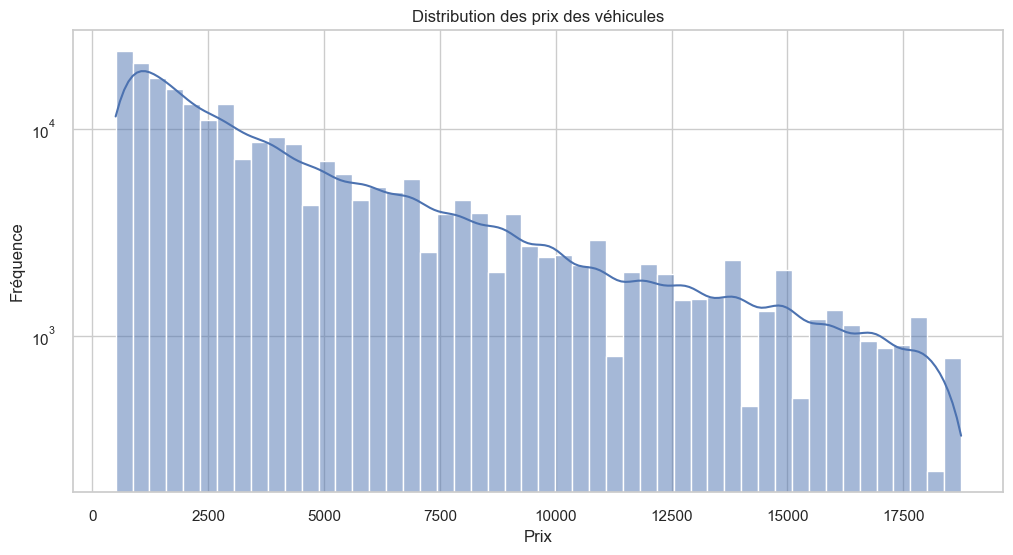

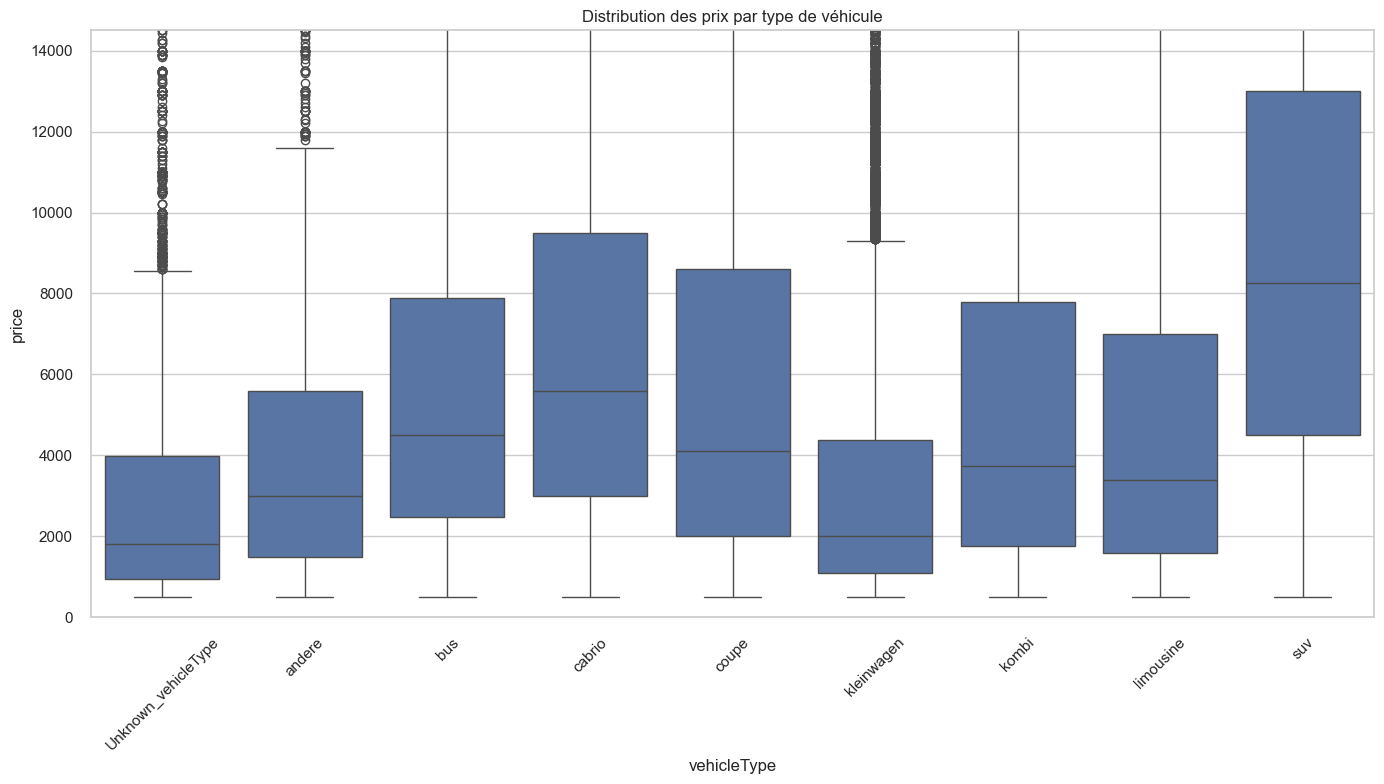

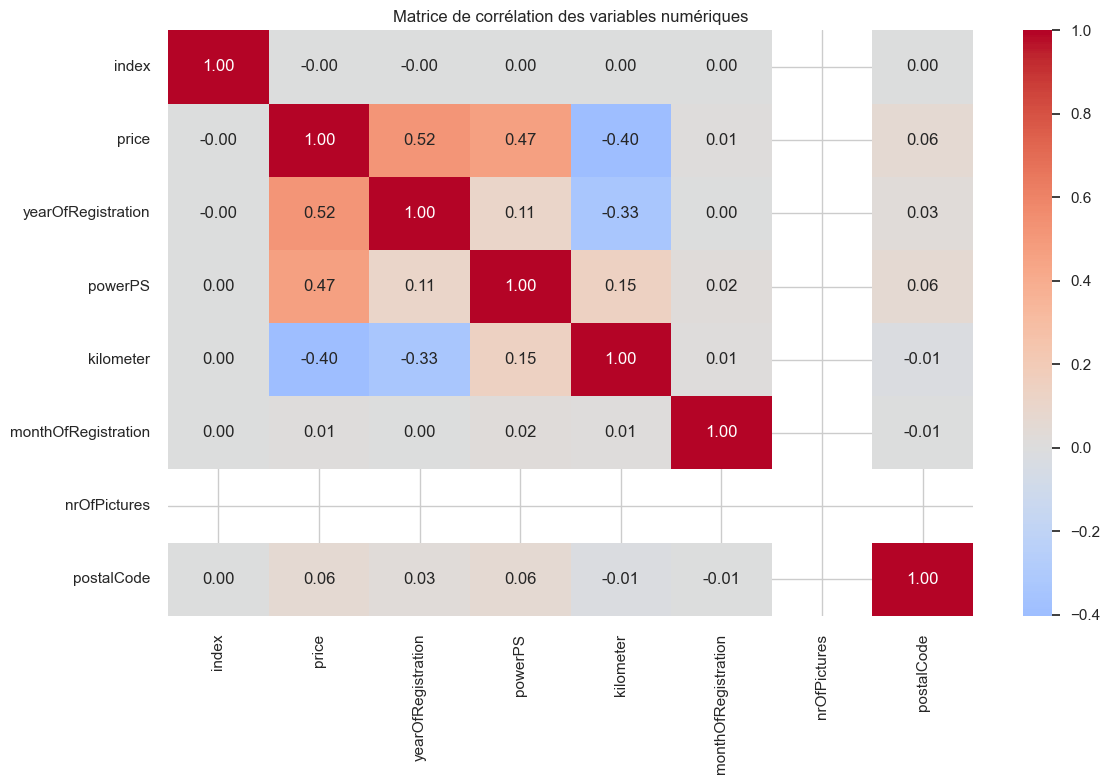

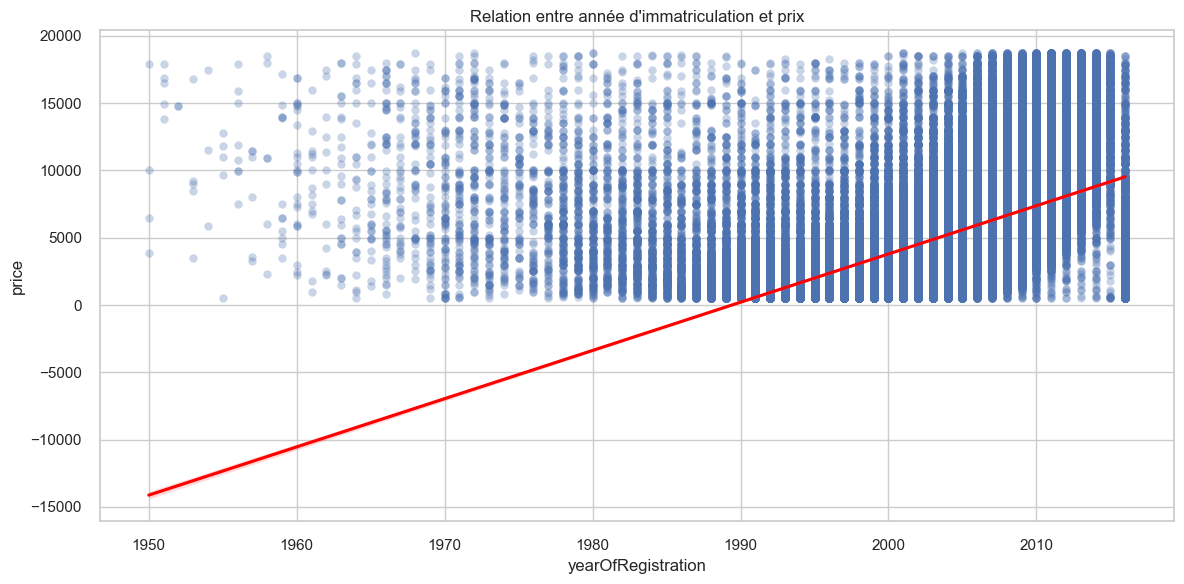

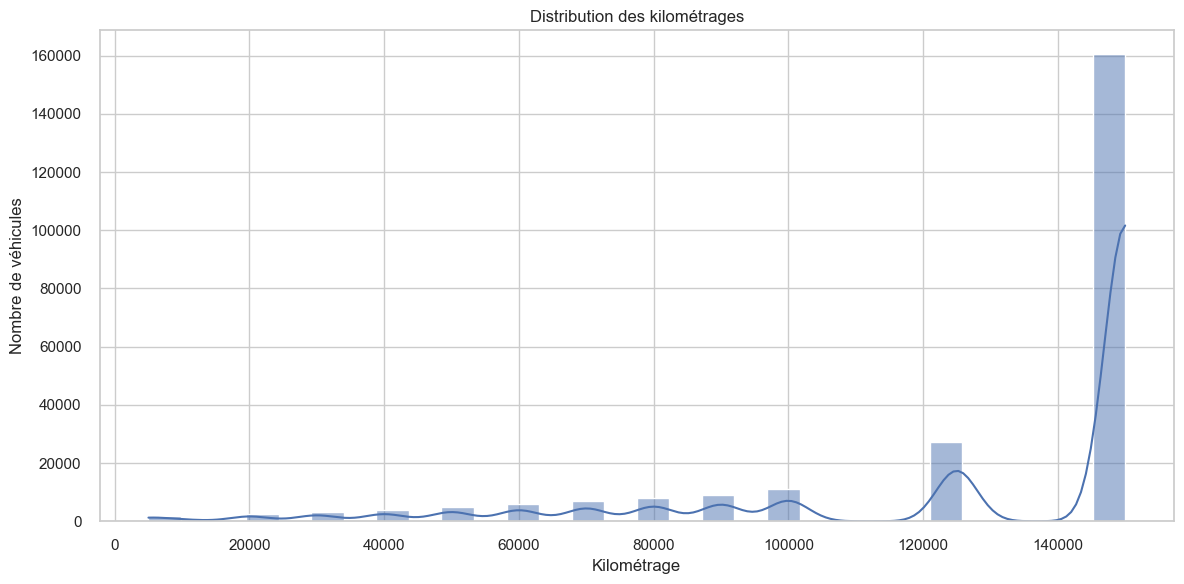

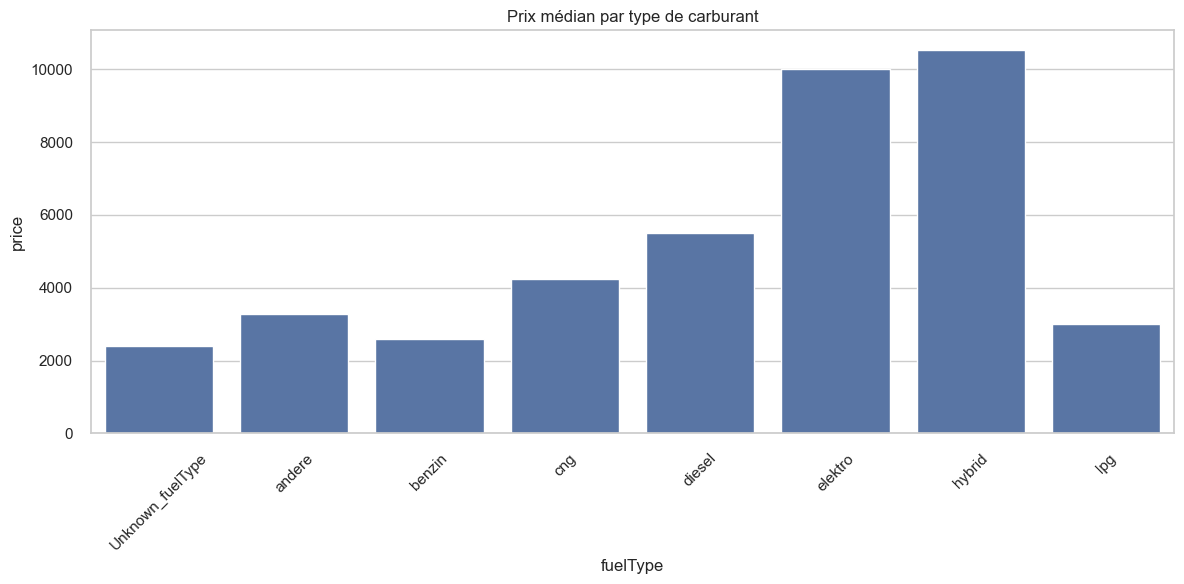

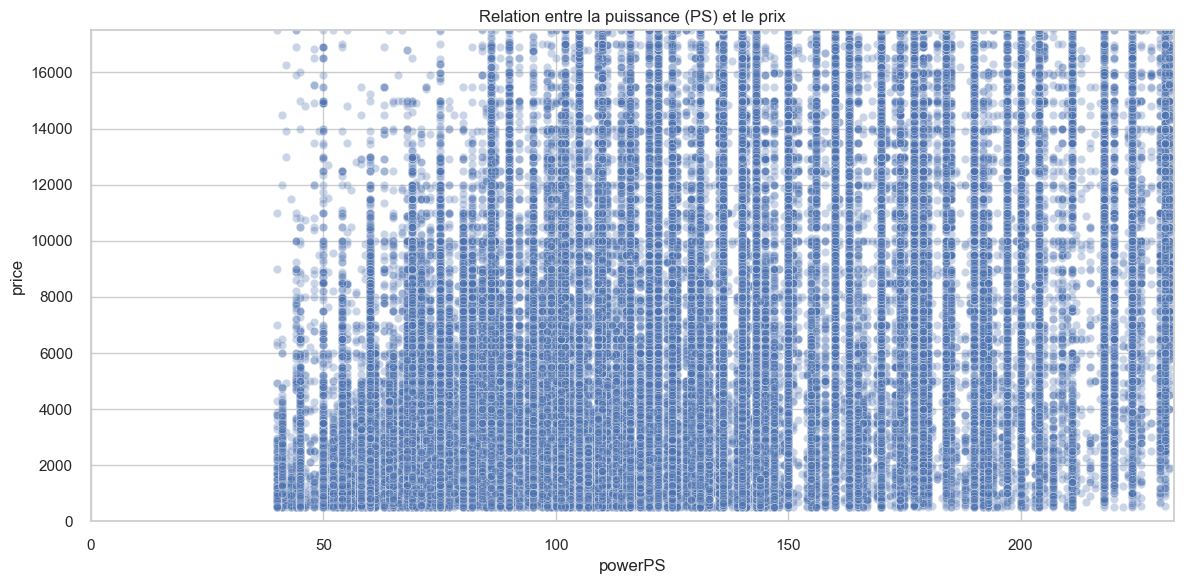

In [141]:
plt.style.use('seaborn-v0_8')  # Style moderne de seaborn
sns.set_theme(style="whitegrid")  # Style de grille pour seaborn
plt.rcParams['figure.figsize'] = (15, 10)

plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution des prix des véhicules')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.yscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='vehicleType', y='price', data=df)
plt.title('Distribution des prix par type de véhicule')
plt.xticks(rotation=45)
plt.ylim(0, df['price'].quantile(0.95))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='yearOfRegistration', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relation entre année d\'immatriculation et prix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['kilometer'], bins=30, kde=True)
plt.title('Distribution des kilométrages')
plt.xlabel('Kilométrage')
plt.ylabel('Nombre de véhicules')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='fuelType', y='price', data=df, estimator=np.median, errorbar=None)
plt.title('Prix médian par type de carburant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='powerPS', y='price', data=df, alpha=0.3)
plt.title('Relation entre la puissance (PS) et le prix')
plt.xlim(0, df['powerPS'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.tight_layout()
plt.show()

# **<font color='red'>Feature dropping</font>**

In [142]:
cols_to_test = [
    'index', 'name', 'dateCrawled', 'dateCreated', 'lastSeen',
    'seller', 'offerType', 'nrOfPictures'
]

for col in cols_to_test:
    if col in df.columns:
        try:
            corr = df[col].astype('category').cat.codes.corr(df['price'])
            print(f"{col}: correlation with price = {corr:.5f}")
        except:
            print(f"{col}: correlation could not be computed")

index: correlation with price = -0.00167
name: correlation with price = -0.08210
dateCrawled: correlation with price = 0.01718
dateCreated: correlation with price = 0.01383
lastSeen: correlation with price = 0.16073
seller: correlation with price = -0.00093
offerType: correlation with price = nan
nrOfPictures: correlation with price = nan


c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [143]:
for col in cols_to_test:
    if col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values")


index: 246077 unique values
name: 149981 unique values
dateCrawled: 204352 unique values
dateCreated: 104 unique values
lastSeen: 132681 unique values
seller: 2 unique values
offerType: 1 unique values
nrOfPictures: 1 unique values


In [144]:
for col in ['seller', 'offerType', 'nrOfPictures']:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False))


Value counts for seller:
seller
privat        246076
gewerblich         1
Name: count, dtype: int64

Value counts for offerType:
offerType
Angebot    246077
Name: count, dtype: int64

Value counts for nrOfPictures:
nrOfPictures
0    246077
Name: count, dtype: Int64


In [145]:
print("Top 10 most frequent 'name' values:")
print(df['name'].value_counts().head(10))

print("\nHow many names appear only once:")
print((df['name'].value_counts() == 1).sum())


Top 10 most frequent 'name' values:
name
BMW_318i               602
Volkswagen_Golf_1.4    567
BMW_316i               500
BMW_320i               482
Volkswagen_Golf_1.6    392
Volkswagen_Polo_1.2    383
Volkswagen_Polo        379
BMW_116i               372
Opel_Corsa             371
Volkswagen_Golf        371
Name: count, dtype: int64

How many names appear only once:
134508


In [146]:
cols_to_drop = [
        'index',
        'name',
        'dateCrawled',
        'dateCreated',
        'lastSeen',
        'seller',
        'offerType',
        'nrOfPictures'
    ]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

### Dropping irrelevant or non-informative columns

We remove the following columns because quantitative inspection shows that they provide no useful or reliable signal for predicting car prices. The decision is based on cardinality, variance, and correlation analysis:

*1. `index`*  
- Pure technical identifier with **246,077 unique values** (one per row).  
- Correlation with price: **-0.0017**, effectively zero.  
- It carries no information about the car itself.

*2. `name`*  
- High-cardinality, unstructured text field: **149,981 unique values**, of which **134,508 appear only once**.  
- This makes it extremely sparse and noisy for tabular models without dedicated NLP processing.  
- Correlation with price is weak (**≈ -0.08**), which is not sufficient to justify the added complexity and noise.  
- We therefore drop it to keep the feature space clean and interpretable.

*3. `dateCrawled`, `dateCreated`, `lastSeen`*  
- These columns describe when the listing was crawled, created or last seen on the platform, not intrinsic properties of the vehicle.  
- Correlation with price is very weak for `dateCrawled` and `dateCreated` (around **0.01–0.02**), and moderate but non-causal for `lastSeen` (**≈ 0.16**), reflecting listing dynamics rather than car attributes.  
- Since our goal is to model price based on vehicle characteristics, we drop these temporal web-activity fields to avoid noise and potential leakage.

*4. `seller`*  
- Distribution after cleaning:  
  - `"privat"`: 246,076 rows  
  - `"gewerblich"`: 1 row  
- The feature is essentially constant, with almost zero variance and negligible correlation with price.  
- Such a feature does not help the model and can safely be removed.

*5. `offerType`*  
- Distribution after cleaning:  
  - `"Angebot"`: 246,077 rows  
- The column has only one category in the final dataset (variance = 0, correlation undefined).  
- A constant feature carries no information and is always removed.

*6. `nrOfPictures`*  
- All listings have `nrOfPictures = 0`.  
- With only one unique value, this feature is completely uninformative.

---

**Conclusion**  
All dropped columns are either constant or quasi-constant, unrelated to the car’s intrinsic properties, or high-cardinality noisy text with only weak correlation to the target. Removing them reduces noise, simplifies the feature space, and allows the model to focus on variables that meaningfully describe the vehicle and influence its price.


# **<font color='red'>Feature engineering</font>**

In [147]:
def features(df):
    df = df.copy()

    cat_cols = [
        'abtest',
        'vehicleType',
        'gearbox',
        'model',
        'fuelType',
        'brand',
        'notRepairedDamage'
    ]

    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    

    
    df["car_age"] = 2016 - df["yearOfRegistration"]
  
    df["km_per_year"] = df["kilometer"] / (df["car_age"] + 1)

    df["early_registration"] = df["monthOfRegistration"].apply(lambda x: 1 if x <= 6 else 0)

    df["ps_per_1000km"] = df["powerPS"] / (df["kilometer"] / 1000 + 1)

    df["ps_per_year"] = df["powerPS"] / (df["car_age"] + 1)

    df["normalized_km"] = df["kilometer"] / df["car_age"].replace(0, 1)

   

    return df

df = features(df)
df.info(verbose=True, max_cols=None, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 246077 entries, 72117 to 53894
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   price                          246077 non-null  Int64  
 1   abtest                         246077 non-null  int64  
 2   vehicleType                    246077 non-null  int64  
 3   yearOfRegistration             246077 non-null  Int64  
 4   gearbox                        246077 non-null  int64  
 5   powerPS                        246077 non-null  Int64  
 6   model                          246077 non-null  int64  
 7   kilometer                      246077 non-null  Int64  
 8   monthOfRegistration            246077 non-null  Int64  
 9   fuelType                       246077 non-null  int64  
 10  brand                          246077 non-null  int64  
 11  notRepairedDamage              246077 non-null  int64  
 12  postalCode                     2

## **<font color='blue'>Création de Segments par Clustering (K-Means)</font>**
Pour affiner l'analyse, nous allons regrouper les voitures en segments homogènes (clusters) en utilisant l'algorithme K-Means. Cela nous permettra de modéliser l'impact de la puissance et d'autres facteurs de manière plus précise pour différents types de véhicules.

In [148]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Sélection des features pour le clustering\n
features_for_clustering = [
    'car_age', 
    'powerPS', 
    'kilometer', 
    'vehicleType',
    'brand'
]

df_cluster = df[features_for_clustering]

# 2. Normalisation des données\n
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

print('Données prêtes pour le clustering.')

Données prêtes pour le clustering.


### **3. Détermination du nombre optimal de clusters (Méthode du coude)**
\n
Nous allons maintenant tester plusieurs nombres de clusters et calculer l'inertie pour chacun (la somme des distances au carré entre les points et le centre de leur cluster). Le nombre optimal de clusters se situe à l'endroit où la diminution de l'inertie ralentit, formant un 'coude' sur le graphique.

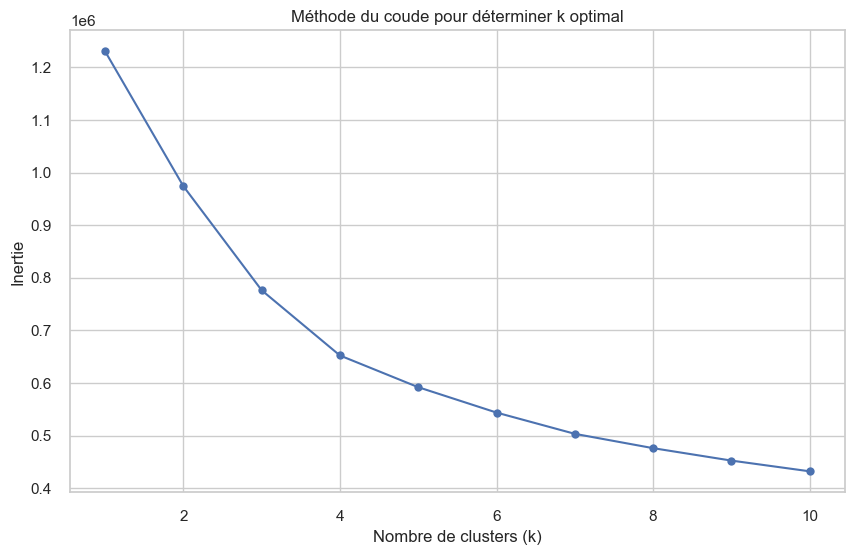

In [149]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer k optimal')
plt.show()

### **4. Application du Clustering et Analyse des Segments**
\n
Le graphique ci-dessus montre un 'coude' assez net à **k=4**. Au-delà de ce point, l'ajout de nouveaux clusters n'apporte plus une réduction significative de l'inertie. Nous choisissons donc de segmenter notre jeu de données en 4 clusters.\n
\n
Nous allons maintenant attribuer un cluster à chaque voiture et analyser les caractéristiques moyennes de chaque groupe pour comprendre leur profil.

In [150]:
# Appliquer K-Means avec k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Analyser le profil de chaque cluster
cluster_profile = df.groupby('cluster')[features_for_clustering + ['price']].mean().round(0)

print('Profil des clusters :')
display(cluster_profile)

Profil des clusters :


,car_age,powerPS,kilometer,vehicleType,brand,price
cluster,,,,,,
0,16.0,92.0,142210.0,6.0,29.0,2632.0
1,13.0,159.0,143764.0,6.0,8.0,5825.0
2,7.0,104.0,61414.0,5.0,22.0,8269.0
3,12.0,120.0,139568.0,2.0,24.0,4849.0


### **5. Visualisation des Clusters**
\n
Pour finir, visualisons ces segments sur un graphique. En plaçant la puissance (`powerPS`) sur l'axe des X et le prix (`price`) sur l'axe des Y, et en colorant chaque voiture par son cluster, nous devrions voir des groupes distincts émerger. Cela confirmera que nos segments ont une signification réelle sur le marché.

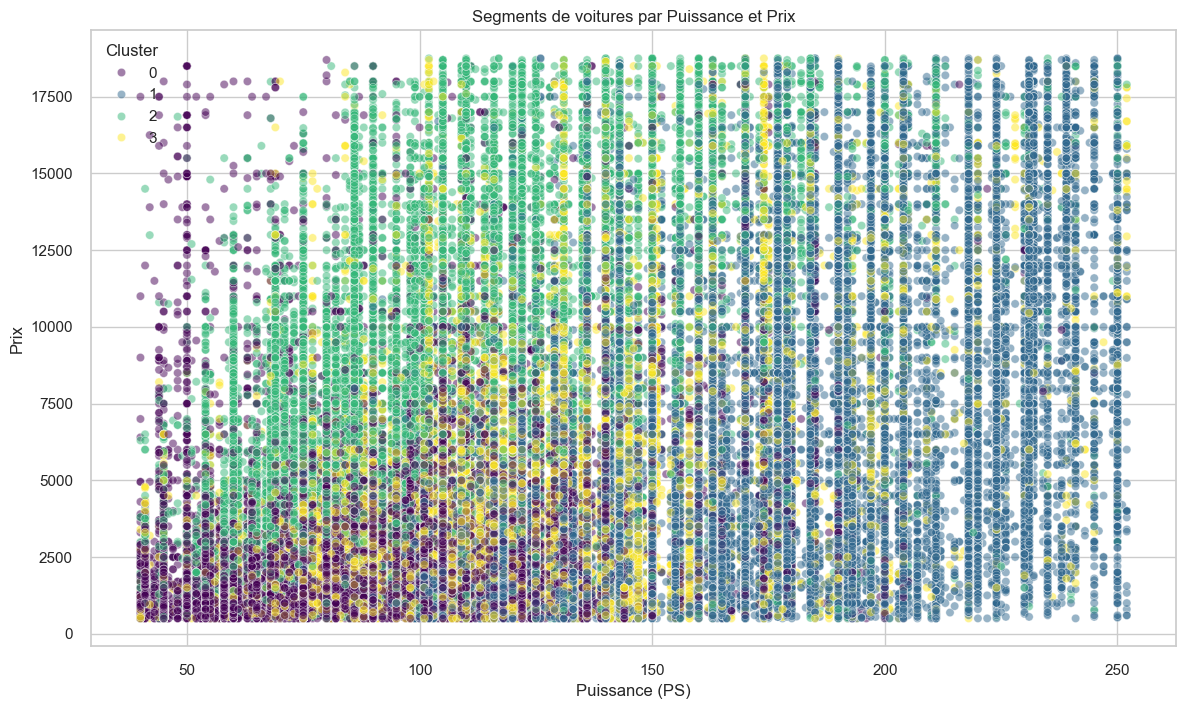

In [151]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='powerPS', y='price', hue='cluster', palette='viridis', alpha=0.5)
plt.title('Segments de voitures par Puissance et Prix')
plt.xlabel('Puissance (PS)')
plt.ylabel('Prix')
plt.legend(title='Cluster')
plt.show()

# **<font color='red'>Modelisation</font>**

In [152]:
X = df.drop(columns=["price"])
y = df["price"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print(f"Train set      : {X_train.shape[0]} rows (60%) -> Used for training models")
print(f"Validation set : {X_val.shape[0]} rows (20%) -> Used for hyperparameter tuning & model selection")
print(f"Test set       : {X_test.shape[0]} rows (20%) -> Used for final performance evaluation only")

Train set      : 147645 rows (60%) -> Used for training models
Validation set : 49216 rows (20%) -> Used for hyperparameter tuning & model selection
Test set       : 49216 rows (20%) -> Used for final performance evaluation only


**Data Splitting Strategy**

To ensure a robust evaluation of our machine learning models, we employed a **three-way hold-out split** strategy (Train / Validation / Test), dividing the dataset into **60% Training**, **20% Validation**, and **20% Testing**.

Given that our dataset exceeds **100,000 observations**, this method was preferred over K-Fold Cross-Validation for the following reasons:

1. **Statistical Significance:** With a large volume of data, a single 20% validation set is statistically representative enough to approximate the generalization error without the need for repeated resampling.
2. **Computational Efficiency:** Since we plan to iterate through various model complexities—from simple baselines to computationally intensive Neural Networks—a fixed split significantly reduces training time compared to training $k$ times for each experiment.
3. **Neural Network Compatibility:** Deep Learning models require a dedicated validation set during training to monitor loss curves and perform "Early Stopping" to prevent overfitting.

### Split Breakdown
* **Training Set (60%):** Used to fit the model parameters.
* **Validation Set (20%):** Used for unbiased model selection and hyperparameter tuning (e.g., grid search).
* **Test Set (20%):** Strictly held out to provide a final, unbiased estimate of the model's performance on unseen data.

## **1. Modèles Baseline**

In [153]:
baseline_pred = np.full_like(y_test, y_train.mean())

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

In [154]:
models = {}

regressors = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial", make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42, n_jobs=-1)), # n_jobs=-1 pour aller plus vite
    ("XGBoost", XGBRegressor(random_state=42, n_jobs=-1)),
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42))
]

print("Training and evaluation on the VALIDATION SET :")
for name, model in regressors:
    model.fit(X_train, y_train)
    
    pred_val = model.predict(X_val)
    
    r2 = r2_score(y_val, pred_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred_val))
    
    models[name] = {"R2": r2, "RMSE": rmse}
    print(f"{name:25} -> R2 Val: {r2:.4f} | RMSE Val: {rmse:.0f}")

df_results = pd.DataFrame(models).T
display(df_results.sort_values(by="R2", ascending=False))

Training and evaluation on the VALIDATION SET :
Linear Regression         -> R2 Val: 0.6566 | RMSE Val: 2504
Polynomial                -> R2 Val: 0.8043 | RMSE Val: 1890
Decision Tree             -> R2 Val: 0.7760 | RMSE Val: 2022
Random Forest             -> R2 Val: 0.8803 | RMSE Val: 1478
XGBoost                   -> R2 Val: 0.8799 | RMSE Val: 1481
CatBoost                  -> R2 Val: 0.8816 | RMSE Val: 1470


,R2,RMSE
CatBoost,0.881608,1469.976998
Random Forest,0.880327,1477.911267
XGBoost,0.879861,1480.781382
Polynomial,0.804329,1889.788933
Decision Tree,0.776018,2021.885127
Linear Regression,0.656562,2503.650044


In [155]:
# models = {
#     "Baseline": baseline_pred,
#     "Linear Regression": lr_pred,
#     "Polynomial Regression": poly_pred,
#     "Decision Tree": tree_pred,
#     "Random Forest": rf_pred,
#     "Gradient Boosting": gb_pred,
#     "XGBoost": xgb_pred,
#     "CatBoost": cat_pred
# }

# r2_scores = {model: r2_score(y_test, pred) for model, pred in models.items()}
# mae_scores = {model: mean_absolute_error(y_test, pred) for model, pred in models.items()}
# mse_scores = {model: mean_squared_error(y_test, pred) for model, pred in models.items()}
# rmse_scores = {model: np.sqrt(mean_squared_error(y_test, pred)) for model, pred in models.items()}

# df_r2 = pd.DataFrame.from_dict(r2_scores, orient='index', columns=["R2 Score"])
# df_mae = pd.DataFrame.from_dict(mae_scores, orient='index', columns=["Mean Absolute Error"])
# df_mse = pd.DataFrame.from_dict(mse_scores, orient='index', columns=["Mean Squared Error"])
# df_rmse = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=["Root Mean Squared Error"])

# metrics_df = pd.concat([df_r2, df_mae, df_mse, df_rmse], axis=1)
# display(metrics_df)     

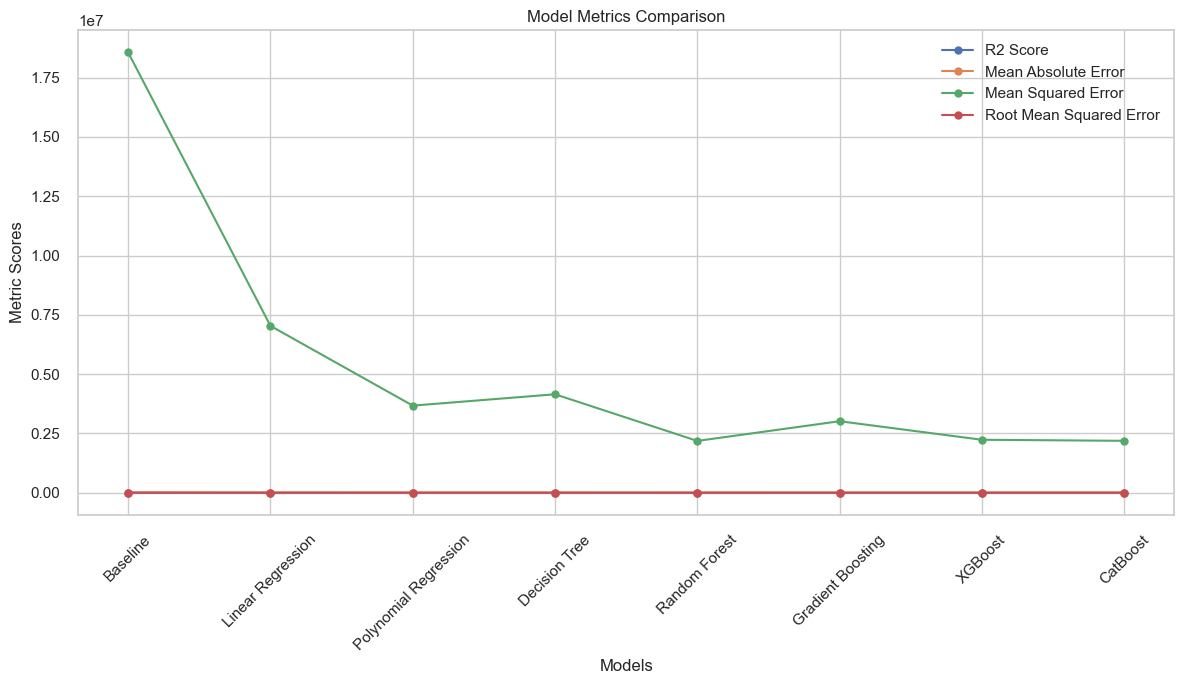

In [ ]:
algorithms = list(models.keys())

plt.figure(figsize=(12, 7))

plt.plot(algorithms, df_r2.valuesa, marker='o', label="R2 Score")
plt.plot(algorithms, df_mae.values, marker='o', label="Mean Absolute Error")
plt.plot(algorithms, df_mse.values, marker='o', label="Mean Squared Error")
plt.plot(algorithms, df_rmse.values, marker='o', label="Root Mean Squared Error")

plt.title("Model Metrics Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## **2. Advanced models**

### 2.1 Advanced versions of the baseline algorithms

#### 2.1.1 Avancé Linéaire

In [164]:
model_pca = Pipeline([
    ('scaler', StandardScaler()),     
    ('pca', PCA(n_components=0.95)),   
    ('regressor', LinearRegression())  
])

model_pca.fit(X_train, y_train)

score_val = model_pca.score(X_val, y_val)
print(f"Score Pipeline PCA sur VALIDATION SET: {score_val:.4f}")

Score Pipeline PCA sur VALIDATION SET: 0.5589


In [166]:
alphas = [0.1, 1.0, 10.0, 100.0]

for alpha in alphas:
    ridge_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=alpha))
    ])
    ridge_pipe.fit(X_train, y_train)
    score_ridge = ridge_pipe.score(X_val, y_val)
    
    lasso_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=alpha, max_iter=2000)) 
    ])
    lasso_pipe.fit(X_train, y_train)
    score_lasso = lasso_pipe.score(X_val, y_val)
    
    print(f"Alpha: {alpha:<5} -> Ridge R²: {score_ridge:.4f} | Lasso R²: {score_lasso:.4f}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.592e+10, tolerance: 2.710e+08
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.1   -> Ridge R²: 0.6566 | Lasso R²: 0.6565


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+08, tolerance: 2.710e+08
  model = cd_fast.enet_coordinate_descent(


Alpha: 1.0   -> Ridge R²: 0.6566 | Lasso R²: 0.6564
Alpha: 10.0  -> Ridge R²: 0.6564 | Lasso R²: 0.6502
Alpha: 100.0 -> Ridge R²: 0.6525 | Lasso R²: 0.5908


#### 2.1.2 Avancé Arbres (Tuning)

In [ ]:
param_grid = {
    'n_estimators': [100, 300],        
    'max_depth': [None, 10, 20],       
    'min_samples_leaf': [1, 5]         
}

best_score = -float('inf')
best_params = {}

keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(f"Test de {len(combinations)} combinaisons en cours...\n")

for params in combinations:
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params)
    
    model.fit(X_train, y_train)
    
    pred_val = model.predict(X_val)
    score_val = r2_score(y_val, pred_val)
    
    print(f"Params: {params} -> R² Val: {score_val:.4f}")
    
    if score_val > best_score:
        best_score = score_val
        best_params = params
        best_model = model

print("-" * 30)
print(f"Meilleurs paramètres trouvés : {best_params}")
print(f"Meilleur RandomForest R² sur VALIDATION SET :  {best_score:.4f}")

Test de 12 combinaisons en cours...

Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1} -> R² Val: 0.8803
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 5} -> R² Val: 0.8775
Params: {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 1} -> R² Val: 0.8397
Params: {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 5} -> R² Val: 0.8395
Params: {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 1} -> R² Val: 0.8799
Params: {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 5} -> R² Val: 0.8771
Params: {'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 1} -> R² Val: 0.8813
Params: {'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 5} -> R² Val: 0.8781
Params: {'n_estimators': 300, 'max_depth': 10, 'min_samples_leaf': 1} -> R² Val: 0.8400
Params: {'n_estimators': 300, 'max_depth': 10, 'min_samples_leaf': 5} -> R² Val: 0.8398
Params: {'n_estimators': 300, 'max_depth': 20, 'min_samples_leaf': 1} -> R²

In [168]:
xgb_params = {
    'n_estimators': [100, 300],      
    'learning_rate': [0.05, 0.1],    
    'max_depth': [3, 6, 10]          
}

best_xgb_score = -float('inf')
best_xgb_params = {}
best_xgb_model = None

keys, values = zip(*xgb_params.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(f"\n--- Tuning XGBoost ({len(combinations)} combinaisons) ---")

for params in combinations:
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    
    model.fit(X_train, y_train)
    
    pred_val = model.predict(X_val)
    score_val = r2_score(y_val, pred_val)
    
    print(f"Params: {params} -> R² Val: {score_val:.4f}")
    
    if score_val > best_xgb_score:
        best_xgb_score = score_val
        best_xgb_params = params
        best_xgb_model = model

print("-" * 30)
print(f"Meilleurs paramètres trouvés           : {best_xgb_params}")
print(f"Meilleur XGBoost R² sur VALIDATION SET : {best_xgb_score:.4f}")


--- Tuning XGBoost (12 combinaisons) ---
Params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3} -> R² Val: 0.8135
Params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 6} -> R² Val: 0.8607
Params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 10} -> R² Val: 0.8816
Params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3} -> R² Val: 0.8396
Params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6} -> R² Val: 0.8727
Params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 10} -> R² Val: 0.8861
Params: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 3} -> R² Val: 0.8487
Params: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 6} -> R² Val: 0.8767
Params: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 10} -> R² Val: 0.8887
Params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 3} -> R² Val: 0.8603
Params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6} -> R² Val: 0.8834
Par

### 2.2 New algorithms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Séparation des caractéristiques et de la cible
X = df.drop('price', axis=1)  # Supposons que 'price' est votre variable cible
y = df['price']

# 2. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 3. Prétraitement
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# 4. Création du modèle
input_dim = X_train_processed.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1)  # Couche de sortie pour la régression
])

# 5. Compilation
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Callbacks
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# 7. Entraînement
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# 8. Évaluation
y_pred = model.predict(X_test_processed).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.4f}')
  

# 9. Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Valeurs prédites vs Valeurs réelles')

plt.tight_layout()
plt.show()

c:\Users\hugod\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: Int64